# Group 1 Final Project Assignment-Part2

*Michael Fagin, Christian Fritz, Macy Fullilove, Xiangshu Nan*

## Initial thoughts

####     Looking at the given dataset, "Appointment No-Shows", my initial assumptions are that the data consists of metrics (x-variables) about different patients and specific information about each one of them. There are 14 columns which include information such as the patient ID, gender, appointment day, age, neighborhood and boolean variables such as whether the patient has hyptertension, diabetes, alcoholism or not. We will use the following metrics (if they are useful) to ultimately predict with a classification model whether or not the patient will make it to their appointment (y-variable). 

In [1]:
#Import Data and Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, linear_model, tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Explore the Data

In [2]:
df_no_show = pd.read_csv('appointment_no_shows.csv')
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df_no_show.shape

(110527, 14)

## Thoughts on the quality of the data 

### As we can see from the above cells, there are 14 columns and over 110,000 rows. From first glance I see a couple columns misspelled which is a problem and we will want to fix this for clarity. We can also see from the info function that some of the columns such as 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism' and 'SMS_received' all need their datatypes transformed to boolean. 'ScheduledDay' and 'AppointmentDay' should be transformed into a datatype such as date or datetime. It appears that there are no 'non-null' values which is excellent for our data quality but we will need to double check this to make sure specific values haven't been mistaken to be 'non-null'. For example, it appears that the minimum age is -1 so we will need to check this further to see why this is, and if it is meant to be a null value. 

## Wrangle the Data

### Efforts to handle missing data

In [6]:
distinct_ages = df_no_show['Age'].unique()
ages = sorted(distinct_ages)
print(ages)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [7]:
age_counts = df_no_show['Age'].value_counts()
print(age_counts)

Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64


#### Considering that it is highly improbable for someone to be 115 (and there are 5 of them here) and impossible to be -1 years old, we will remove these rows from the dataset:

In [8]:
df_no_show = df_no_show[df_no_show['Age'] != -1]
df_no_show = df_no_show[df_no_show['Age'] != 115]
print(df_no_show['Age'].value_counts())

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64


#### Now, we are fixing the spelling for 'Hipertension' to correct it to 'Hypertension' and 'Handcap' to 'Handicap':

In [9]:
df_no_show = df_no_show.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap'
})
print(df_no_show)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841190e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572130e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596270e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557660e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213490e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775120e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

#### Changing datatypes to boolean where needed:

In [10]:
columns_to_check = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Gender', 'No-show']
unique_values = df_no_show[columns_to_check].nunique()
print(unique_values)

Scholarship     2
Hypertension    2
Diabetes        2
Alcoholism      2
Handicap        5
SMS_received    2
Gender          2
No-show         2
dtype: int64


In [11]:
handicap = df_no_show['Handicap'].value_counts()
print(handicap)

Handicap
0    108284
1      2038
2       183
3        13
4         3
Name: count, dtype: int64


In [12]:
# List of columns to be converted to boolean
columns_to_convert = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']

# Convert specified columns to boolean
for column in columns_to_convert:
    df_no_show[column] = df_no_show[column].astype(bool)

print(df_no_show.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hypertension         bool
Diabetes             bool
Alcoholism           bool
Handicap            int64
SMS_received         bool
No-show            object
dtype: object


In [13]:
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No


### Changing datatypes to datetime 

In [14]:
df_no_show['ScheduledDay'] = pd.to_datetime(df_no_show['ScheduledDay'])
df_no_show['AppointmentDay'] = pd.to_datetime(df_no_show['AppointmentDay'])
#df_no_show['AppointmentDay'] = df_no_show['AppointmentDay'].dt.date
print(df_no_show.dtypes)

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                        int64
SMS_received                     bool
No-show                        object
dtype: object


### Creating new feature

In [15]:
df_no_show['WaitingDays'] = (df_no_show['AppointmentDay'] - df_no_show['ScheduledDay']).dt.days

In [16]:
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No,-1
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No,-1
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No,-1
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,-1
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No,-1


### Changing the No-show variable datatype from object to numeric

In [17]:
df_no_show['No-show'] = df_no_show['No-show'].map({'Yes': True, 'No': False})
df_no_show['Gender'] = df_no_show['Gender'].map({'M': 0, 'F': 1})
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingDays
0,2.987250e+13,5642903,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1
1,5.589980e+14,5642503,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1
2,4.262960e+12,5642549,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1
3,8.679510e+11,5642828,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1
4,8.841190e+12,5642494,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1


### Drop Columns that are unwanted

In [18]:
df_no_show = df_no_show.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)
df_no_show

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingDays
0,1,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1
1,0,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1
2,1,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1
3,1,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1
4,1,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1
...,...,...,...,...,...,...,...,...,...,...,...
110522,1,56,MARIA ORTIZ,False,False,False,False,0,True,False,34
110523,1,51,MARIA ORTIZ,False,False,False,False,0,True,False,34
110524,1,21,MARIA ORTIZ,False,False,False,False,0,True,False,40
110525,1,38,MARIA ORTIZ,False,False,False,False,0,True,False,40


df_no_show = df_no_show.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID', 'Neighbourhood'], axis=1)
df_no_show

In [19]:
df_no_show.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'WaitingDays'],
      dtype='object')

In [20]:
df_no_show['No-show'].unique()

array([False,  True])

In [21]:
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110521 non-null  int64 
 1   Age            110521 non-null  int64 
 2   Neighbourhood  110521 non-null  object
 3   Scholarship    110521 non-null  bool  
 4   Hypertension   110521 non-null  bool  
 5   Diabetes       110521 non-null  bool  
 6   Alcoholism     110521 non-null  bool  
 7   Handicap       110521 non-null  int64 
 8   SMS_received   110521 non-null  bool  
 9   No-show        110521 non-null  bool  
 10  WaitingDays    110521 non-null  int64 
dtypes: bool(6), int64(4), object(1)
memory usage: 5.7+ MB


In [22]:
print("No-Show and Show Count of Patients\n")
print(df_no_show.groupby(['No-show']).size())
print("\nNo-show and Show '%' of Patients\n")
show = df_no_show.groupby(['No-show']).size().iloc[0]/(df_no_show.groupby(['No-show']).size().iloc[0]+df_no_show.groupby(['No-show']).size().iloc[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))
noshow = df_no_show.groupby(['No-show']).size().iloc[1]/(df_no_show.groupby(['No-show']).size().iloc[0]+df_no_show.groupby(['No-show']).size().iloc[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))


No-Show and Show Count of Patients

No-show
False    88205
True     22316
dtype: int64

No-show and Show '%' of Patients

Percent of Patients who `Showed Up` => 79.81%
Percent of Patients who Did `Not Showed Up` => 20.19%


##### From the above information we can see around 80% of the patients are keeping their scheduled appointments and around 20% are missing their scheduled appointments.

# Data Visualization & Assumptions

### Below we can see that out of 110,500 patients around 88,000 of them have turned up and that's around 80%.

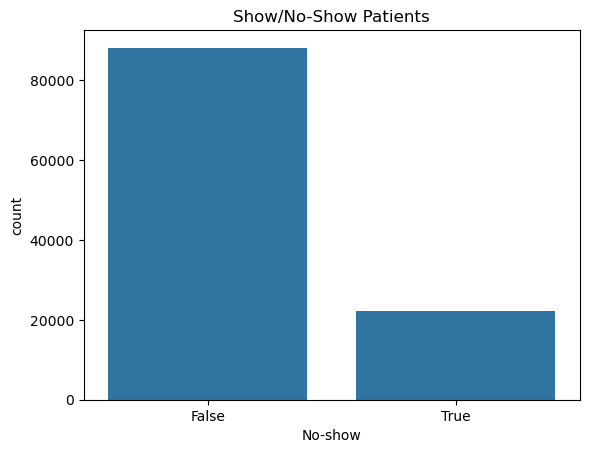

In [23]:
ax = sns.countplot(x=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/No-Show Patients")
plt.show()


### Assumption 1-Gender is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

#### Below we can see that out of the 88,000 patients that have turned up, around 57,000 of them are males and 31,000 are females. Of the 22,500 patients that haven't come for the visit around 15,000 are males and 7,500 are females The ratio of Females to Males that have turned up looks simiar to those who haven't come for a visit.



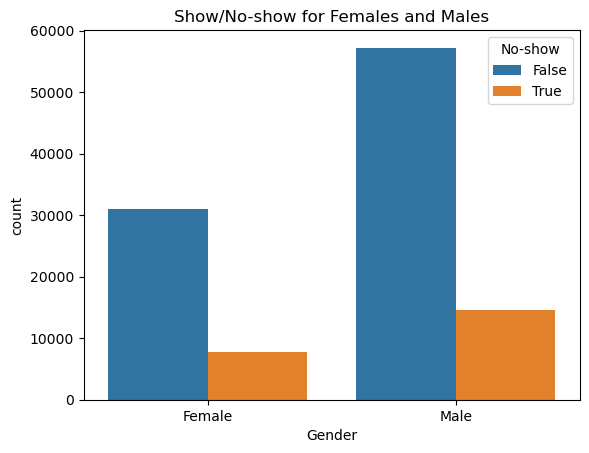

In [24]:
ax = sns.countplot(x=df_no_show['Gender'], hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/No-show for Females and Males")
ax.set_xticks([0, 1])
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can clearly see that more 'male' patients have scheduled appointments compared to 'female' patients. But if we closely look at the No-show distribution across Male's and Female's it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not. 

### Assumption 2-Age is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

#### Below we will plot the number of patients for different Age.

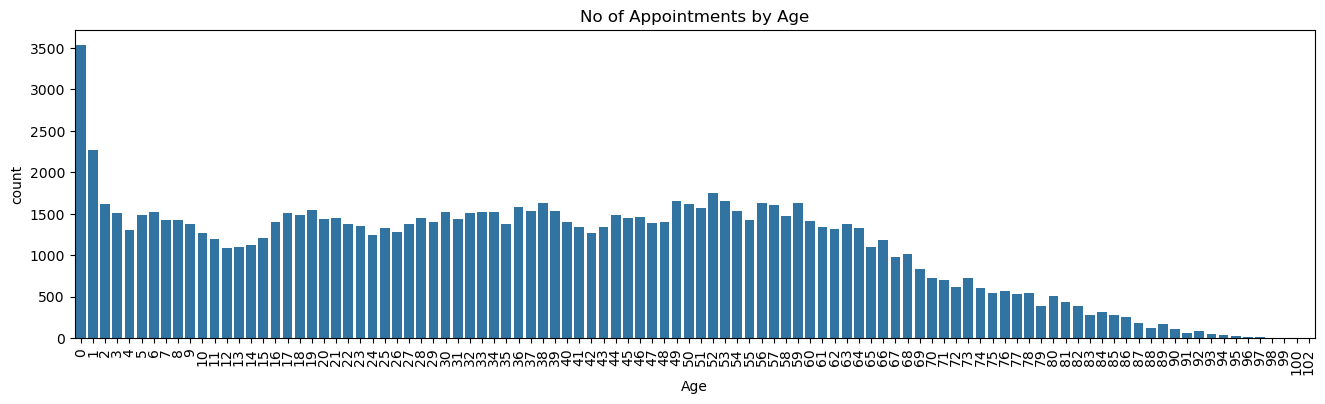

In [25]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_no_show.Age)
ax.set_title("No of Appointments by Age")
plt.show()

#### From the above Histogram we can see that there are peaks for the Infants and then the distribution starts to be uniform. Later, after the Age of around 60 we see a right-skewed distribution.

#### Below we will plot the Show/No-show for the patients based on their Age.

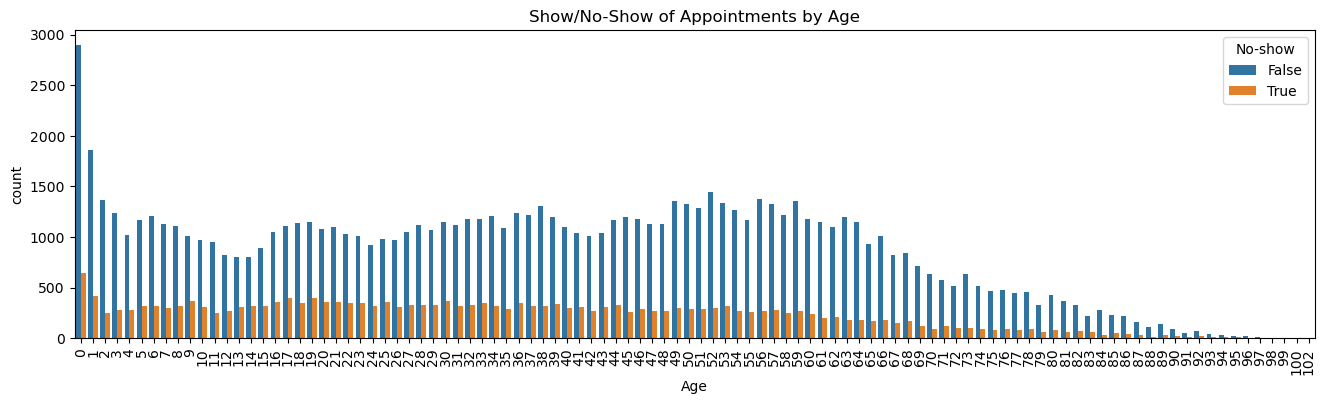

In [26]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_no_show.Age, hue=df_no_show['No-show'])
ax.set_title("Show/No-Show of Appointments by Age")
plt.show()

#### From the above visualization it looks like the ratio of Show to No-show is almost the same for all Age's except for 'Age 0' and 'Age 1'. We will get a better clarity on the ratio of Show to No-show for all Age's. 

### Assumption 3-Scholarship is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

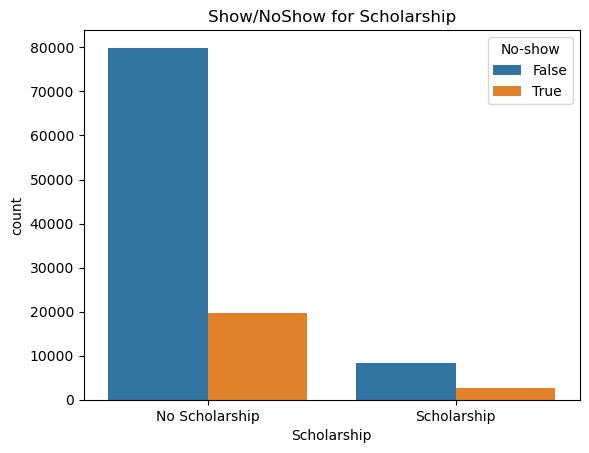

In [27]:
ax = sns.countplot(x=df_no_show.Scholarship, hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/NoShow for Scholarship")
ax.set_xticks([0, 1])
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit Out of the 10,500 patients with Scholarship around 75% of them have come for the visit. So, Scholarship feature could help us in determining if a patient will keep their scheduled appointment. 

#### Assumption 4-Hypertension is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

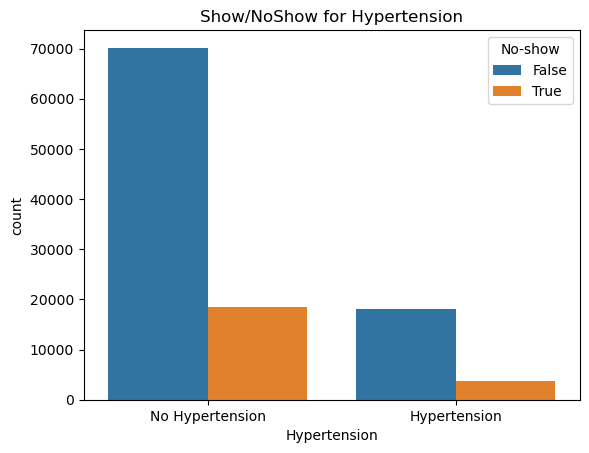

In [28]:
ax = sns.countplot(x=df_no_show.Hypertension, hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/NoShow for Hypertension")
ax.set_xticks([0, 1])
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 88,000 patients without Hypertension and out of them around 78% have come for the visit. Out of the 22,500 patients with Hypertension around 85% of them have come for the visit. So, the Hypertension feature could help us in determining if a patient will keep their scheduled appointment. 

# Assumption 5-Diabetes is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

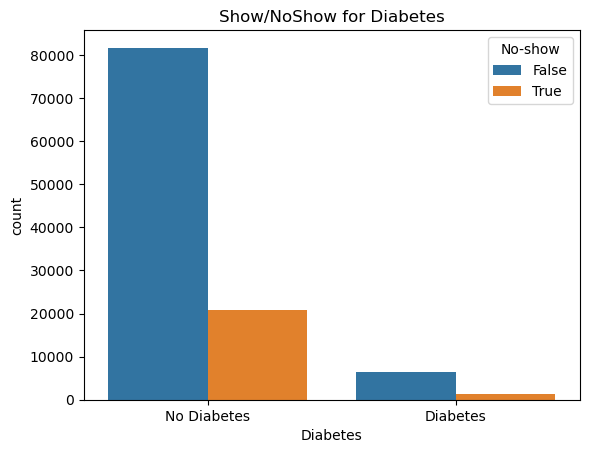

In [29]:
ax = sns.countplot(x=df_no_show.Diabetes, hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/NoShow for Diabetes")
ax.set_xticks([0, 1])
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit. Out of the 8,500 patients with Diabetes around 83% of them have come for the visit. So, the Diabetes feature could help us in determining if a patient will keep their scheduled appointment. 

# Assumption 6-Alcoholism is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

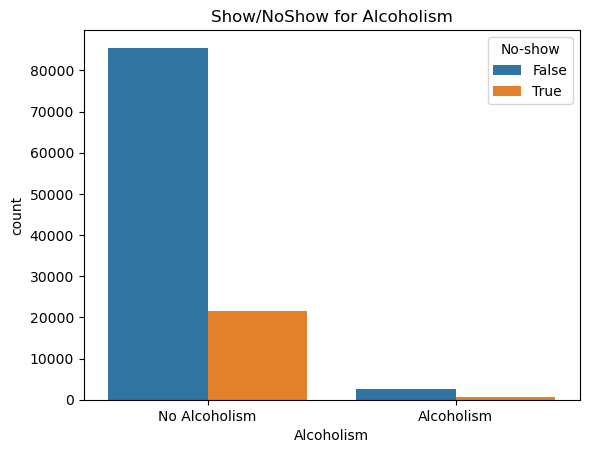

In [30]:
ax = sns.countplot(x=df_no_show.Alcoholism, hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/NoShow for Alcoholism")
ax.set_xticks([0, 1])
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 105,000 patients without Alcoholism and out of them around 80% have come for the visit. Out of the 5,500 patients with Alcoholism around 80% of them have come for the visit. As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will keep their scheduled appointment.

# Assumption 7-Handicap is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

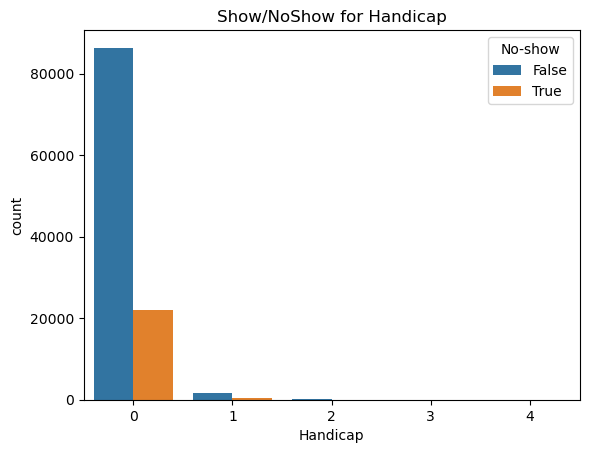

In [31]:
ax = sns.countplot(x=df_no_show.Handicap, hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/NoShow for Handicap")
plt.show()

#### From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have come for the visit. As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after scheduling an appointment.


# Assumption 8-SMS_received is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

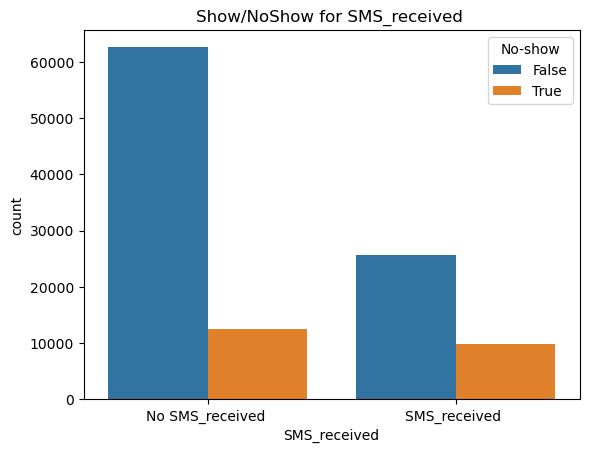

In [32]:
ax = sns.countplot(x=df_no_show['SMS_received'] , hue=df_no_show['No-show'], data=df_no_show)
ax.set_title("Show/NoShow for SMS_received ")
ax.set_xticks([0, 1])
x_ticks_labels=['No SMS_received ', 'SMS_received ']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit. Out of the 35,500 patients who have received SMS around 72% of them have come for the visit. (This looks opposite to what we would expect. People who do receive a reminder SMS would be expected to keep their scheduled appointments compared to those patients who do not receive a SMS reminder. Or this could be an SMS that was received while booking an appointment and could possibly have no correlation with the visit probability.) As we can see a clear distinction between people receiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after making an appointment. 

# Assumption 9-Waiting_Time is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

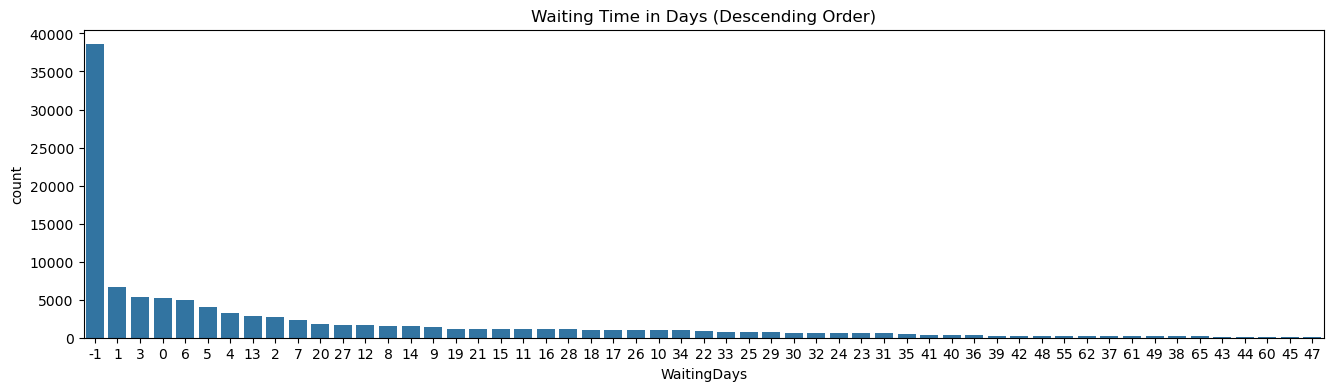

In [33]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_no_show['WaitingDays'], order=df_no_show['WaitingDays'].value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

#### From the above visualization we can see that most of the patients book their appointments on the same day (Ideally the AppointmentDay should be on or after the ScheduledDay. Below we will check if there are any records where there is an inconsistency. In case the ScheduledDay is after the AppointmentDay we will consider AppointmentDay and ScheduledDay are the same day). The next highest waiting times are 2days, 4 days and 1 day. As we have a clear distinction for the patients Show/No-show with the Waitingdays feature this indeed should help us with a better prediction.

# Assumption 10-Neighbourhood is more likely to influence No-show. Identifying features can help determine if a patient will show up for an appointment.

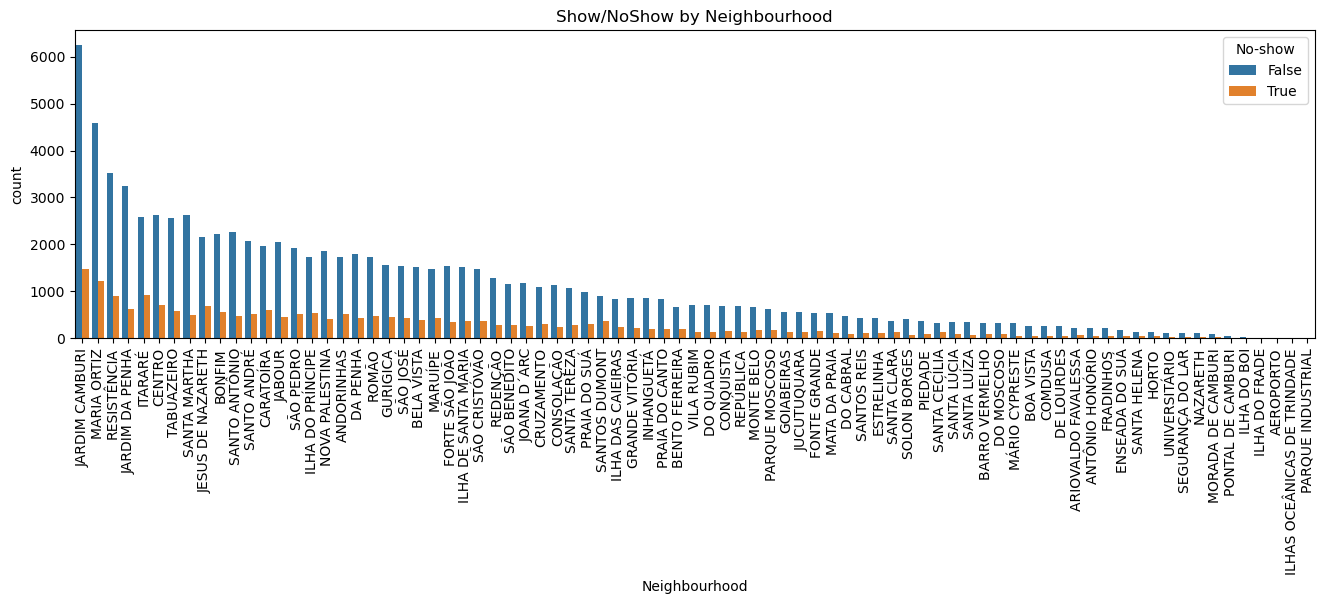

In [34]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df_no_show['Neighbourhood'], hue=df_no_show['No-show'], order=df_no_show['Neighbourhood'].value_counts().index)
ax.set_title("Show/NoShow by Neighbourhood")
plt.show()

#### From the above visualization it looks like the ratio of Show to No-show is almost the same for all Neighborhood's. We will get a better clarity on the ratio of Show to No-show for all Neighborhood's in the below visualization.

### Encoding the categorical variable 'Neighbourhood'.

In [35]:
# Identify the column to be one-hot encoded
categorical_column = 'Neighbourhood'
numerical_columns = df_no_show.columns.difference([categorical_column])
# One-hot encode the specified categorical column
X_categorical = pd.get_dummies(df_no_show[categorical_column], drop_first=True)
# Combine numerical and encoded categorical columns
X_numerical = df_no_show[numerical_columns]
df_no_show = pd.concat([X_numerical, X_categorical], axis=1)

In [36]:
df_no_show

,Age,Alcoholism,Diabetes,Gender,Handicap,Hypertension,No-show,SMS_received,Scholarship,WaitingDays,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,62,False,False,1,0,True,False,False,False,-1,...,False,False,False,False,False,False,False,False,False,False
1,56,False,False,0,0,False,False,False,False,-1,...,False,False,False,False,False,False,False,False,False,False
2,62,False,False,1,0,False,False,False,False,-1,...,False,False,False,False,False,False,False,False,False,False
3,8,False,False,1,0,False,False,False,False,-1,...,False,False,False,False,False,False,False,False,False,False
4,56,False,True,1,0,True,False,False,False,-1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,False,False,1,0,False,False,True,False,34,...,False,False,False,False,False,False,False,False,False,False
110523,51,False,False,1,0,False,False,True,False,34,...,False,False,False,False,False,False,False,False,False,False
110524,21,False,False,1,0,False,False,True,False,40,...,False,False,False,False,False,False,False,False,False,False
110525,38,False,False,1,0,False,False,True,False,40,...,False,False,False,False,False,False,False,False,False,False


# Modelling using cleaned data

### From the basic exploratory data analysis (EDA), we can see that about 80% of the patients did not miss their appointments, meaning they attended as scheduled. This phenomenon can lead to a data imbalance problem in classification tasks. Data imbalance can affect the model's performance because the model may tend to predict the majority class. To improve the model's performance, we need to take some measures to address the data imbalance issue. There are three major methods to handle data imbalance, such as Under-sampling, Over-sampling, and Systhetic Minority Over-sampling Technique (SMOTE). We can use SMOTE from the imblearn library to handle the data imbalance problem. 

In [37]:
# Separate features and target variable
y = df_no_show['No-show']
X = df_no_show.drop('No-show', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Initialize models

### The following models are defined for evaluation: Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,Gaussian Naive Bayes. Due to the extended runtime required for Support Vector Machine and Gaussian Naive Bayes models, and based on previous model performance metrics where Logistic Regression, Decision Tree, and Random Forest had the highest scores, we have decided to exclude Support Vector Machine and Gaussian Naive Bayes models to save computation time.

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'GaussianNB': GaussianNB()
}

In [38]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

## Initialize evaluation

### The following models were evaluated using 5-fold cross-validation to determine their average F1 scores for predicting patient no-shows. The F1 score is a measure of a model's accuracy that considers both precision and recall.

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=True)
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer)
    print(f"{name} Average F1 Score: {scores.mean()}")

### Assuming we have already  evaluated all models using 'cross_val_score' and decided to proceed with hyperparameter tuning for Decision Tree and Random Forest model, we will use GridSearchCV to optimize the hyperparameters of these two models. We will perform hyperparameter tuning on the Decision Tree and Random Forest models and evaluated the tuned models on the test set. The specific steps include: 1.  Initial Evaluation: Using cross_val_score to perform an initial evaluation of all models and selecting Decision Tree and Random Forest for tuning. 2.Define Parameter Grid: Defining the parameter grid for Decision Tree and Random Forest that need tuning. 3. Use Grid Search for Tuning: Using GridSearchCV to find the best parameters on the training set. 4.Evaluate Model Performance: Evaluating the tuned models on the test set and printing the classification reports.

# Continuing with Hyperparameter Tuning

### Define Parameter Grid

In [ ]:
# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Use Grid Search for Tuning

In [ ]:
# Create Decision Tree and Random Forest classifier instances with balanced class weight
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Perform Grid Search for hyperparameter tuning
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit models
dt_grid_search.fit(X_train_resampled, y_train_resampled)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Output best parameters
print(f"Best Decision Tree Params: {dt_grid_search.best_params_}")
print(f"Best Random Forest Params: {rf_grid_search.best_params_}")

### Use Best Parameters for Prediction and Evaluate the Model

In [ ]:
# Use best parameters for prediction
dt_best = dt_grid_search.best_estimator_
rf_best = rf_grid_search.best_estimator_
y_pred_dt = dt_best.predict(X_test)
y_pred_rf = rf_best.predict(X_test)

In [ ]:
# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Summary

### The Decision Tree model has an overall accuracy of 0.66. It performs well in predicting the 'False' class (patients who keep their scheduled appointments) with a precision of 0.84 and a recall of 0.71, resulting in an F1-score of 0.77. However, the performance for the 'True' class (patients who are a no-show) is lower, with a precision of 0.30 and a recall of 0.48, resulting in an F1-score of 0.37.

### The Random Forest model has an overall accuracy of 0.65. It performs similarly to the Decision Tree in predicting the 'False' class (patients who keep their scheduled appointments) with a precision of 0.87 and a recall of 0.67, resulting in an F1-score of 0.75. The model performs slightly better than the Decision Tree for the 'True' class (patients who no-show), with a precision of 0.31 and a recall of 0.59, resulting in an F1-score of 0.41.

# LImitations

### An very important thing that was missing from the data is the Time details in the AppointmentDay which would really help us a lot in predicting NoShow of a patient. As we have the time detail for ScheduledDay, we should have saved the similar thing in AppointmentDay also and not just normalize it.Also, a reason for the appointment and the consultation doctor specialization would have helped us a lot in making better analysis and predictions for the NoShow of a patient.

# Conclusion

### In conclusion, while the current models provide a good starting point for predicting patient no-shows, there is room for improvement. By leveraging additional data, refining the models, and implementing operational strategies based on the insights gained, healthcare providers can significantly reduce no-show rates and improve overall appointment adherence.